In [7]:
#from statsmodels.tsa.regime_switching.tests.test_markov_autoregression
import statsmodels.api as sm
import seaborn as sn
import pandas as pd

In [8]:
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]

In [9]:
dta.head()

,rgnp,date,recession
1,2.593164,1951-04-01,0
2,2.202171,1951-07-01,0
3,0.458276,1951-10-01,0
4,0.968744,1952-01-01,0
5,-0.241308,1952-04-01,0


In [10]:
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

In [11]:
dta_hamilton

date
1951-04-01    2.593164
1951-07-01    2.202171
1951-10-01    0.458276
1952-01-01    0.968744
1952-04-01   -0.241308
                ...   
1983-10-01    1.615505
1984-01-01    2.709301
1984-04-01    1.244614
1984-07-01    0.508355
1984-10-01    0.148022
Freq: QS-JAN, Name: rgnp, Length: 135, dtype: float32

<AxesSubplot:title={'center':'Growth rate of RGNP'}, xlabel='date'>

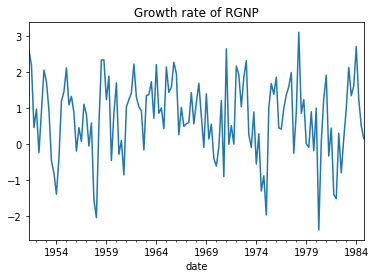

In [12]:
dta_hamilton.plot(title='Growth rate of RGNP')

In [14]:
import statsmodels.api as sm
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

In [15]:
print(res_hamilton.summary())

                         Markov Switching Model Results                         
Dep. Variable:                     rgnp   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Wed, 27 Dec 2023   AIC                            380.527
Time:                          14:50:23   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 

In [16]:
res_hamilton.expected_durations

array([ 4.07604748, 10.42589378])

In [17]:
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

In [18]:
usrec

,USREC
DATE,
1947-01-01,0
1947-02-01,0
1947-03-01,0
1947-04-01,0
1947-05-01,0
...,...
2012-12-01,0
2013-01-01,0
2013-02-01,0


[(-6484.0, 5387.0),
 (0.0, 1.0),
 Text(0.5, 1.0, 'Filtered probability of recession')]

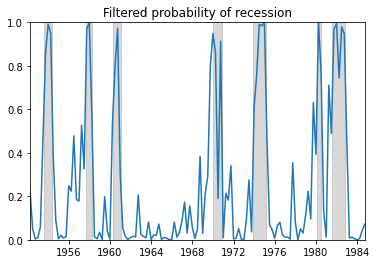

In [27]:
import matplotlib.pyplot as plt
_, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(usrec.index, 0, 1, where=usrec['USREC'].values, color='gray', alpha=0.3)
ax.set(xlim=(dta_hamilton.index[4], dta_hamilton.index[-1]), ylim=(0, 1), title='Filtered probability of recession')